# Transfer Learning
Categorical Classification with language

In [1]:
import pandas as pd
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
from keras import models,layers
%matplotlib inline

Using TensorFlow backend.
/Users/luigibungaro/dsr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)
#in this way we are considering just the 10000 more used words

In [3]:
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)
print(len(train_data[0]),len(train_data[1]))

(8982,) (8982,) (2246,) (2246,)
87 56


In [4]:
import numpy as np
lenghts = [len(x) for x in train_data]#list comprehension
print('min=',np.min(lenghts))
print('mean',np.mean(lenghts))
print('std=',np.std(lenghts))
print('max',np.max(lenghts))
print('shape',train_data.shape)

min= 13
mean 145.5398574927633
std= 145.81413013409278
max 2376
shape (8982,)


In [5]:
word_index = reuters.get_word_index()

In [6]:
len(word_index)  #this is the actual number of possible words, but we have selected just 10k

30979

In [7]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()]) 

In [8]:
x1 = pd.DataFrame(train_labels)
x2 = pd.DataFrame(test_labels)

In [9]:
print(x1.nunique())
print(x2.nunique())

0    46
dtype: int64
0    46
dtype: int64


In [10]:
def vectorize_sequences(sequences,dimension=10000):  #take sequenses and turn them into vectors
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = train_labels[i]   #fancy indexing
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train.shape #this shape means that we have 8982 samples and 10k features
#the 10k features will be the input of our neural network

(8982, 10000)

In [12]:
x_test.shape

(2246, 10000)

In [13]:
train_labels.shape
#we have 46 kind of possible outputs, so we need to transform this into a shape of
#8982x46 

(8982,)

In [20]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.utils import to_categorical
y_train = to_categorical(train_labels) #1 element become an array of 46 elements
y_test = to_categorical(test_labels)

history = model.fit(x_train,y_train,epochs=10,batch_size=128, validation_split=0.2)


Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 14s 2ms/step - loss: 2.3476 - acc: 0.7241 - val_loss: 1.9509 - val_acc: 0.7874
Epoch 2/10
7185/7185 [==============================] - 14s 2ms/step - loss: 1.2745 - acc: 0.8863 - val_loss: 1.9403 - val_acc: 0.7908
Epoch 3/10
7185/7185 [==============================] - 14s 2ms/step - loss: 1.0857 - acc: 0.9090 - val_loss: 1.9778 - val_acc: 0.7958
Epoch 4/10
7185/7185 [==============================] - 14s 2ms/step - loss: 1.0516 - acc: 0.9133 - val_loss: 2.1094 - val_acc: 0.7880
Epoch 5/10
7185/7185 [==============================] - 14s 2ms/step - loss: 1.0130 - acc: 0.9223 - val_loss: 2.0096 - val_acc: 0.8052
Epoch 6/10
7185/7185 [==============================] - 13s 2ms/step - loss: 0.9870 - acc: 0.9253 - val_loss: 2.0058 - val_acc: 0.8114
Epoch 7/10
7185/7185 [==============================] - 14s 2ms/step - loss: 0.9815 - acc: 0.9276 - val_loss: 2.1258 - val_acc: 0.7924
Epoch 8

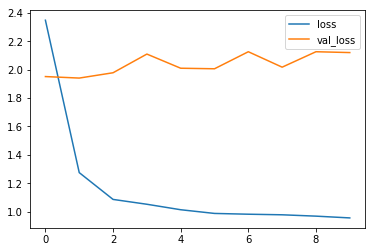

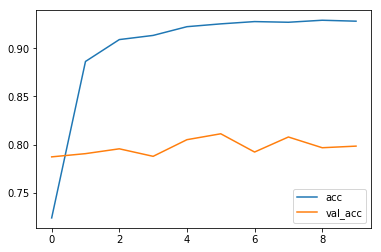

In [21]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss') 
plt.legend()
plt.show()
plt.close()

plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.legend()
plt.show()
plt.close()